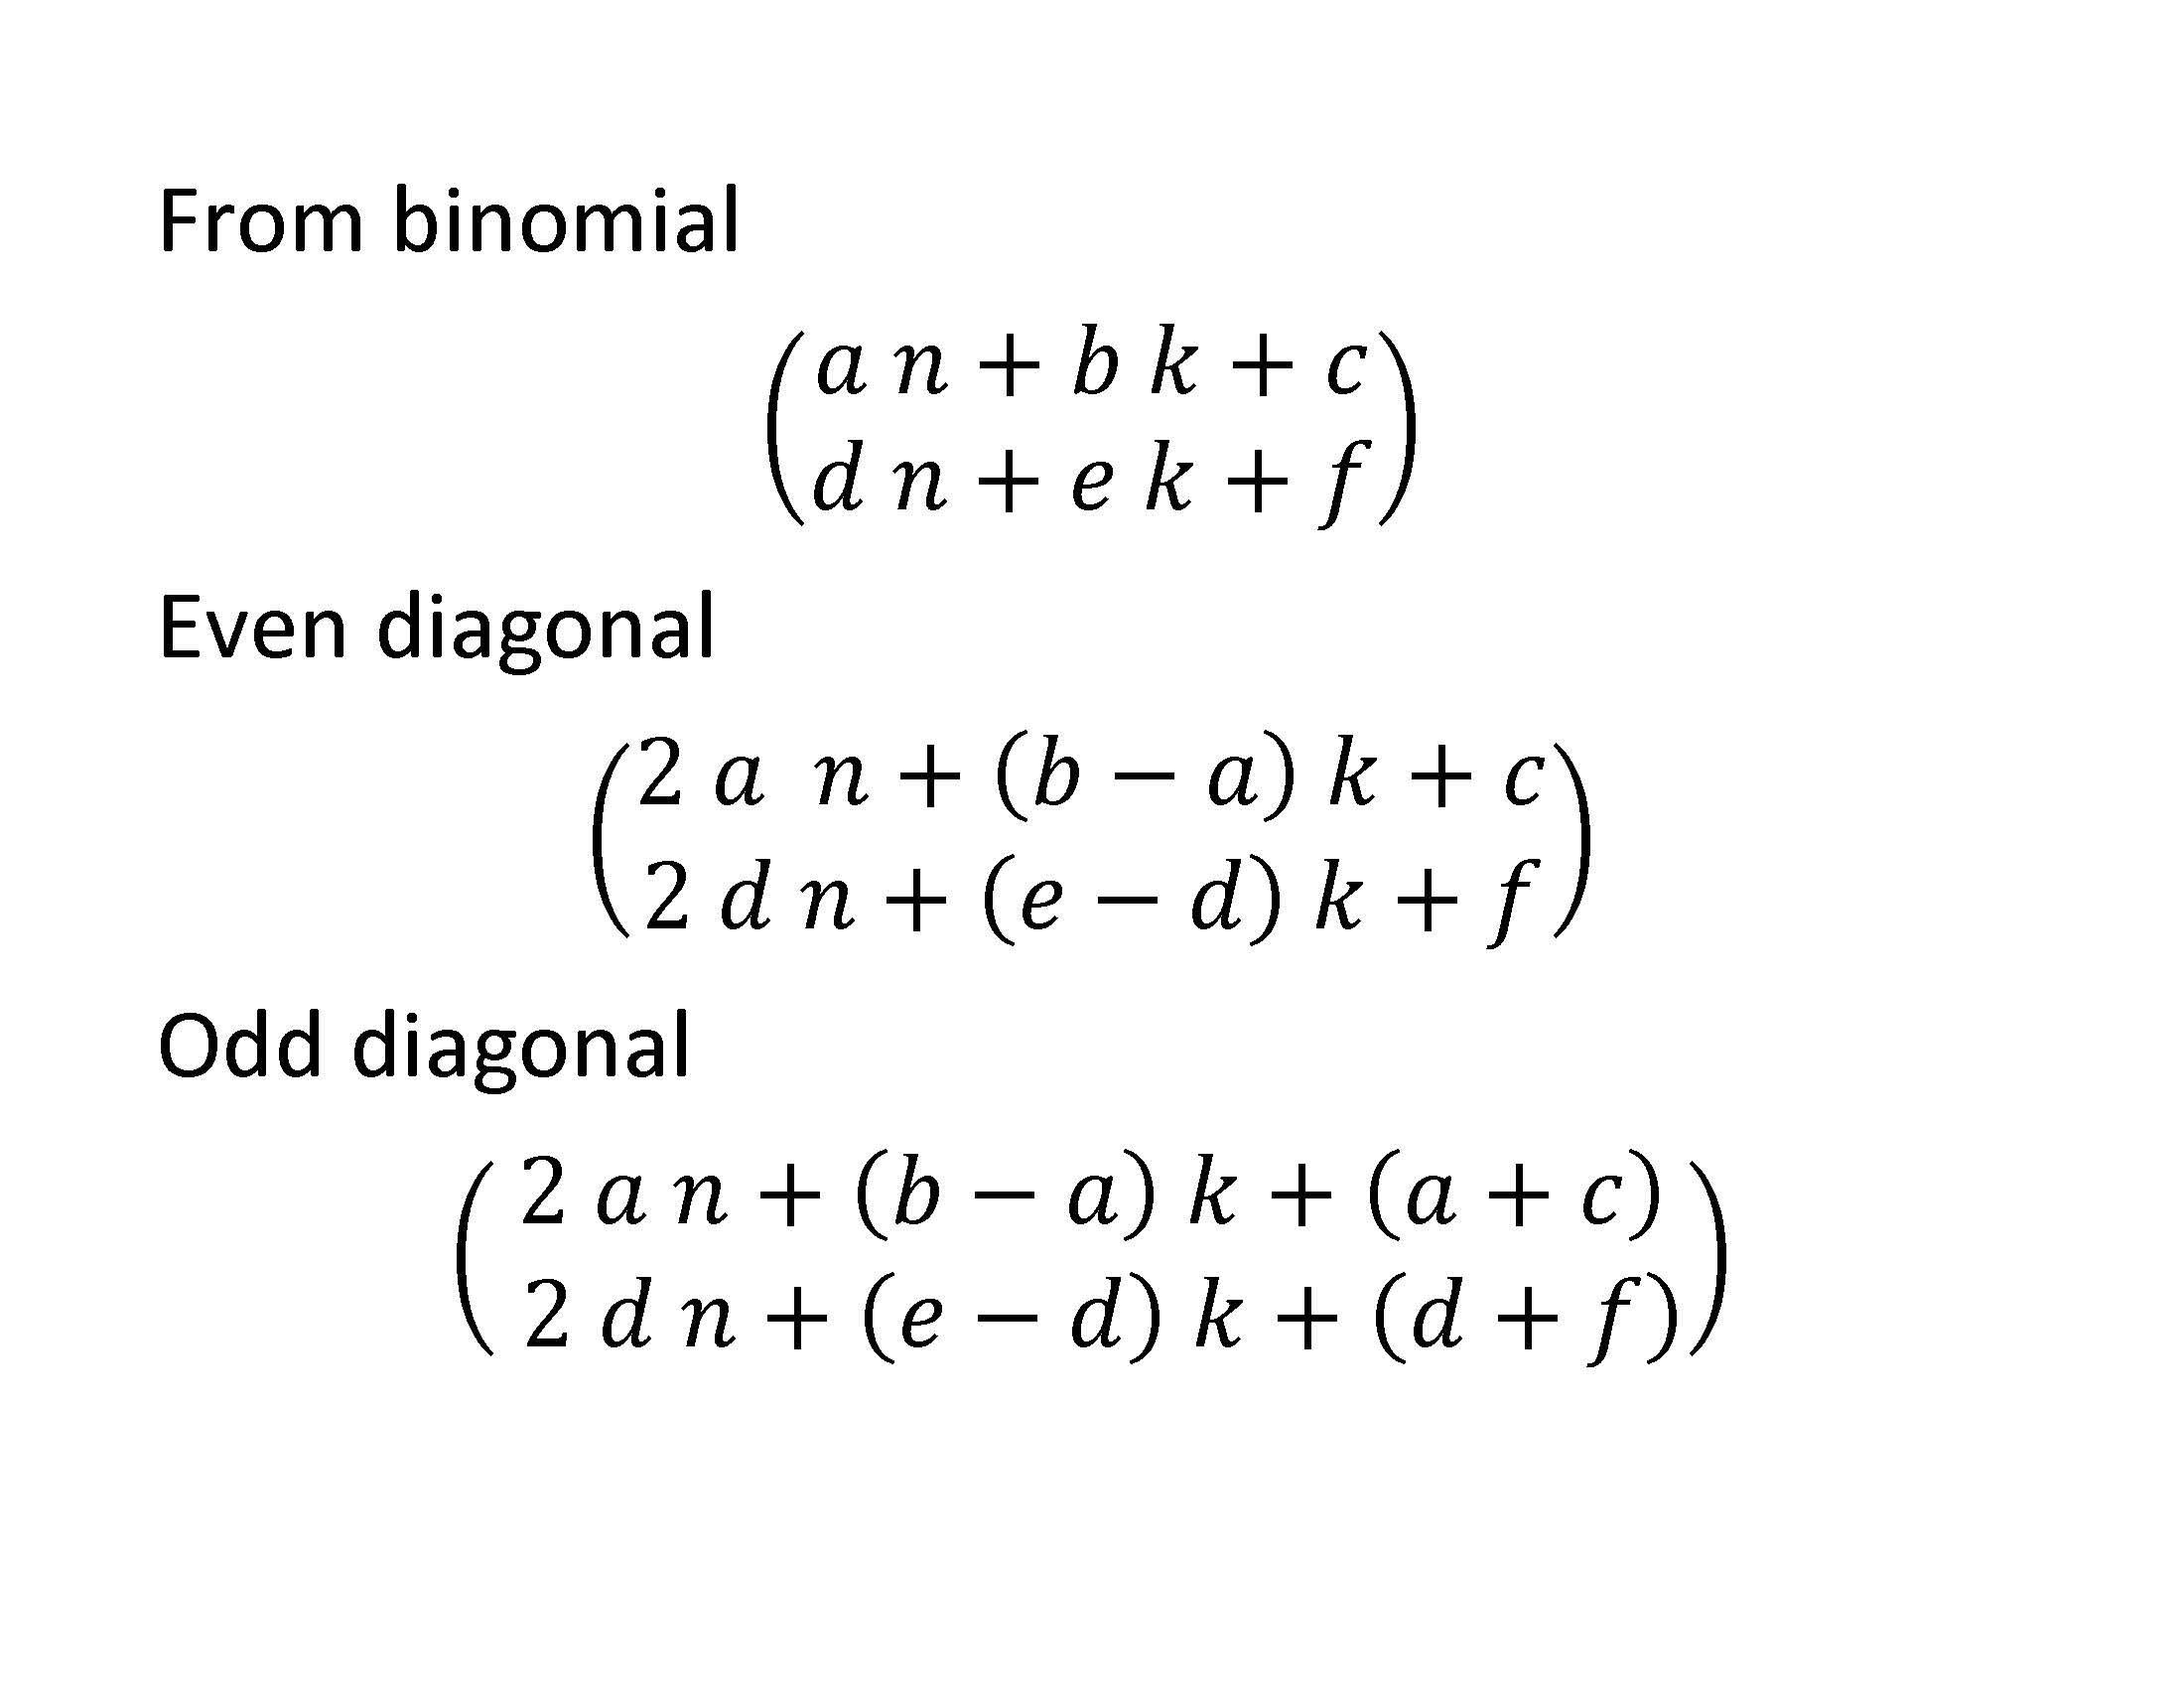

In [1]:
from sympy import *
from IPython.display import display, Markdown, Math
init_session(use_latex=True)
from math import comb

IPython console for SymPy 1.9 (Python 3.9.7-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
threeshold = 17
def Search(seq, depth, n = [1, 0, 0], k = [0, 1, 0]):
    a, b, c = n
    if abs(a) > threeshold: return None, None
    d, e, f = k
    if abs(d) > threeshold: return None, None
    a_inv, b_inv = a + b, -b
    d_inv, e_inv = d + e, -e
    string, string_inv = '', ''
    for row in range(depth+1):
        tmp_n = a * row + c
        tmp_k = d * row + f
        tmp_n_inv = a_inv * row + c
        tmp_k_inv = d_inv * row + f
        for col in range(row+1):
            try:
                string += ', '+str(comb(tmp_n + b * col, tmp_k + e * col))
            except:
                pass
            try:
                string_inv += ', '+str(comb(tmp_n_inv + b_inv * col, tmp_k_inv + e_inv * col))
            except:
                pass
    if seq in string:
        return string, ([a,b,c], [d,e,f])
    if seq in string_inv:
        return string_inv, ([a_inv, b_inv, c], [d_inv, e_inv, f])
    even = Search(seq, depth, [2*a, b-a, c], [2*d, e-d, f])
    if even[0]: return even
    odd =  Search(seq, depth, [2*a, b-a, c+a], [2*d, e-d, f+d])
    if odd[0]: return odd
    even_inv = Search(seq, depth, [2*a_inv, b_inv-a_inv, c], [2*d_inv, e_inv-d_inv, f])
    if even_inv[0]: return even_inv
    odd_inv = Search(seq, depth, [2*a_inv, b_inv-a_inv, c+a_inv], [2*d_inv, e_inv-d_inv, f+d_inv])
    if odd_inv[0]: return odd_inv
    return None, None
    
def search(seq, depth):
    try:
        sequence, ((a,b,c), (d,e,f)) = Search(seq, depth)
    except:
        return None, None
    n, k = symbols('n, k')
    return sequence[2:], binomial(a*n+b*k+c,d*n+e*k+f)


In [3]:
depth = 10
while True:
    seq = ', '.join(input('Insert sequences separated by commas:\n').replace(' ', '').split(','))
    sequence, formula = search(seq[2:], depth)
    sequence = sequence.split(', ')
    i, m = 0, [[0]*(depth+1) for k in range(depth+1)]
    for row in range(depth+1):
        for col in range(row+1):
            m [row][col] = int(sequence[i])
            i += 1
    m = Matrix(m)
    display(
                Markdown(
                    'Found sequence in {}\n'.format(latex(m, mode='inline'))+\
                    ' Formula = {}'.format(latex(formula, mode='inline')))
    )
    if not input('Continue? (y/n)').lower() in 'yes':
        break

Insert sequences separated by commas:
1,5,10,10,5,1


Found sequence in $\left[\begin{smallmatrix}1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\1 & 2 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\1 & 3 & 3 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\1 & 4 & 6 & 4 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\1 & 5 & 10 & 10 & 5 & 1 & 0 & 0 & 0 & 0 & 0\\1 & 6 & 15 & 20 & 15 & 6 & 1 & 0 & 0 & 0 & 0\\1 & 7 & 21 & 35 & 35 & 21 & 7 & 1 & 0 & 0 & 0\\1 & 8 & 28 & 56 & 70 & 56 & 28 & 8 & 1 & 0 & 0\\1 & 9 & 36 & 84 & 126 & 126 & 84 & 36 & 9 & 1 & 0\\1 & 10 & 45 & 120 & 210 & 252 & 210 & 120 & 45 & 10 & 1\end{smallmatrix}\right]$
 Formula = ${\binom{n}{k}}$

Continue? (y/n)y
Insert sequences separated by commas:
9,120,462,792,715,364,105,16


Found sequence in $\left[\begin{smallmatrix}1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\2 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\3 & 4 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\4 & 10 & 6 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\5 & 20 & 21 & 8 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\6 & 35 & 56 & 36 & 10 & 1 & 0 & 0 & 0 & 0 & 0\\7 & 56 & 126 & 120 & 55 & 12 & 1 & 0 & 0 & 0 & 0\\8 & 84 & 252 & 330 & 220 & 78 & 14 & 1 & 0 & 0 & 0\\9 & 120 & 462 & 792 & 715 & 364 & 105 & 16 & 1 & 0 & 0\\10 & 165 & 792 & 1716 & 2002 & 1365 & 560 & 136 & 18 & 1 & 0\\11 & 220 & 1287 & 3432 & 5005 & 4368 & 2380 & 816 & 171 & 20 & 1\end{smallmatrix}\right]$
 Formula = ${\binom{k + n + 1}{- k + n}}$

Continue? (y/n)yes
Insert sequences separated by commas:
16,105,364,715,792,462,120,9


Found sequence in $\left[\begin{smallmatrix}1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\1 & 2 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\1 & 4 & 3 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\1 & 6 & 10 & 4 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\1 & 8 & 21 & 20 & 5 & 0 & 0 & 0 & 0 & 0 & 0\\1 & 10 & 36 & 56 & 35 & 6 & 0 & 0 & 0 & 0 & 0\\1 & 12 & 55 & 120 & 126 & 56 & 7 & 0 & 0 & 0 & 0\\1 & 14 & 78 & 220 & 330 & 252 & 84 & 8 & 0 & 0 & 0\\1 & 16 & 105 & 364 & 715 & 792 & 462 & 120 & 9 & 0 & 0\\1 & 18 & 136 & 560 & 1365 & 2002 & 1716 & 792 & 165 & 10 & 0\\1 & 20 & 171 & 816 & 2380 & 4368 & 5005 & 3432 & 1287 & 220 & 11\end{smallmatrix}\right]$
 Formula = ${\binom{- k + 2 n + 1}{k}}$

Continue? (y/n)y
Insert sequences separated by commas:
1,1,1,1,3,1,1,6,5,1


Found sequence in $\left[\begin{smallmatrix}1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\1 & 3 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\1 & 6 & 5 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\1 & 10 & 15 & 7 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\1 & 15 & 35 & 28 & 9 & 1 & 0 & 0 & 0 & 0 & 0\\1 & 21 & 70 & 84 & 45 & 11 & 1 & 0 & 0 & 0 & 0\\1 & 28 & 126 & 210 & 165 & 66 & 13 & 1 & 0 & 0 & 0\\1 & 36 & 210 & 462 & 495 & 286 & 91 & 15 & 1 & 0 & 0\\1 & 45 & 330 & 924 & 1287 & 1001 & 455 & 120 & 17 & 1 & 0\\1 & 55 & 495 & 1716 & 3003 & 3003 & 1820 & 680 & 153 & 19 & 1\end{smallmatrix}\right]$
 Formula = ${\binom{k + n}{- k + n}}$

Continue? (y/n)yes
Insert sequences separated by commas:
1,1,1,1,3,1,1,5,6,1


Found sequence in $\left[\begin{smallmatrix}1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\1 & 3 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\1 & 5 & 6 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\1 & 7 & 15 & 10 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\1 & 9 & 28 & 35 & 15 & 1 & 0 & 0 & 0 & 0 & 0\\1 & 11 & 45 & 84 & 70 & 21 & 1 & 0 & 0 & 0 & 0\\1 & 13 & 66 & 165 & 210 & 126 & 28 & 1 & 0 & 0 & 0\\1 & 15 & 91 & 286 & 495 & 462 & 210 & 36 & 1 & 0 & 0\\1 & 17 & 120 & 455 & 1001 & 1287 & 924 & 330 & 45 & 1 & 0\\1 & 19 & 153 & 680 & 1820 & 3003 & 3003 & 1716 & 495 & 55 & 1\end{smallmatrix}\right]$
 Formula = ${\binom{- k + 2 n}{k}}$

Continue? (y/n)y
Insert sequences separated by commas:
1,1,1,1,6,1


Found sequence in $\left[\begin{smallmatrix}1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\1 & 6 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\1 & 15 & 15 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\1 & 28 & 70 & 28 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\1 & 45 & 210 & 210 & 45 & 1 & 0 & 0 & 0 & 0 & 0\\1 & 66 & 495 & 924 & 495 & 66 & 1 & 0 & 0 & 0 & 0\\1 & 91 & 1001 & 3003 & 3003 & 1001 & 91 & 1 & 0 & 0 & 0\\1 & 120 & 1820 & 8008 & 12870 & 8008 & 1820 & 120 & 1 & 0 & 0\\1 & 153 & 3060 & 18564 & 43758 & 43758 & 18564 & 3060 & 153 & 1 & 0\\1 & 190 & 4845 & 38760 & 125970 & 184756 & 125970 & 38760 & 4845 & 190 & 1\end{smallmatrix}\right]$
 Formula = ${\binom{2 n}{- 2 k + 2 n}}$

Continue? (y/n)y
Insert sequences separated by commas:
1,1,3,1,10,5


Found sequence in $\left[\begin{smallmatrix}1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\1 & 3 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\1 & 10 & 5 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\1 & 21 & 35 & 7 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\1 & 36 & 126 & 84 & 9 & 0 & 0 & 0 & 0 & 0 & 0\\1 & 55 & 330 & 462 & 165 & 11 & 0 & 0 & 0 & 0 & 0\\1 & 78 & 715 & 1716 & 1287 & 286 & 13 & 0 & 0 & 0 & 0\\1 & 105 & 1365 & 5005 & 6435 & 3003 & 455 & 15 & 0 & 0 & 0\\1 & 136 & 2380 & 12376 & 24310 & 19448 & 6188 & 680 & 17 & 0 & 0\\1 & 171 & 3876 & 27132 & 75582 & 92378 & 50388 & 11628 & 969 & 19 & 0\\1 & 210 & 5985 & 54264 & 203490 & 352716 & 293930 & 116280 & 20349 & 1330 & 21\end{smallmatrix}\right]$
 Formula = ${\binom{2 n + 1}{- 2 k + 2 n + 1}}$

Continue? (y/n)y
Insert sequences separated by commas:
1,1,1,1,15,1,1,45, 70,1


Found sequence in $\left[\begin{smallmatrix}1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\1 & 15 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\1 & 45 & 70 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\1 & 91 & 495 & 210 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\1 & 153 & 1820 & 3003 & 495 & 1 & 0 & 0 & 0 & 0 & 0\\1 & 231 & 4845 & 18564 & 12870 & 1001 & 1 & 0 & 0 & 0 & 0\\1 & 325 & 10626 & 74613 & 125970 & 43758 & 1820 & 1 & 0 & 0 & 0\\1 & 435 & 20475 & 230230 & 735471 & 646646 & 125970 & 3060 & 1 & 0 & 0\\1 & 561 & 35960 & 593775 & 3108105 & 5311735 & 2704156 & 319770 & 4845 & 1 & 0\\1 & 703 & 58905 & 1344904 & 10518300 & 30045015 & 30421755 & 9657700 & 735471 & 7315 & 1\end{smallmatrix}\right]$
 Formula = ${\binom{- 2 k + 4 n}{2 k}}$

Continue? (y/n)y
Insert sequences separated by commas:
1,1,1,1,70,1


Found sequence in $\left[\begin{smallmatrix}1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\1 & 70 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\1 & 495 & 495 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\1 & 1820 & 12870 & 1820 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\1 & 4845 & 125970 & 125970 & 4845 & 1 & 0 & 0 & 0 & 0 & 0\\1 & 10626 & 735471 & 2704156 & 735471 & 10626 & 1 & 0 & 0 & 0 & 0\\1 & 20475 & 3108105 & 30421755 & 30421755 & 3108105 & 20475 & 1 & 0 & 0 & 0\\1 & 35960 & 10518300 & 225792840 & 601080390 & 225792840 & 10518300 & 35960 & 1 & 0 & 0\\1 & 58905 & 30260340 & 1251677700 & 7307872110 & 7307872110 & 1251677700 & 30260340 & 58905 & 1 & 0\\1 & 91390 & 76904685 & 5586853480 & 62852101650 & 137846528820 & 62852101650 & 5586853480 & 76904685 & 91390 & 1\end{smallmatrix}\right]$
 Formula = ${\binom{4 n}{- 4 k + 4 n}}$

Continue? (y/n)y
Insert sequences separated by commas:
1,58905,10518300,30421755


Found sequence in $\left[\begin{smallmatrix}1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\1 & 495 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\1 & 4845 & 12870 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\1 & 20475 & 735471 & 125970 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\1 & 58905 & 10518300 & 30421755 & 735471 & 1 & 0 & 0 & 0 & 0 & 0\\1 & 135751 & 76904685 & 1251677700 & 601080390 & 3108105 & 1 & 0 & 0 & 0 & 0\\1 & 270725 & 377348994 & 21090682613 & 62852101650 & 7307872110 & 10518300 & 1 & 0 & 0 & 0\\1 & 487635 & 1420494075 & 206379406870 & 2254848913647 & 1761039350070 & 62852101650 & 30260340 & 1 & 0 & 0\\1 & 814385 & 4426165368 & 1399358844975 & 41648951840265 & 125994627894135 & 32247603683100 & 416714805914 & 76904685 & 1 & 0\\1 & 1282975 & 11969016345 & 7282025622664 & 488526937079580 & 4191844505805495 & 4355031703297275 & 426384982032100 & 2254848913647 & 177232627 & 1\end{smallmatrix}\right]$
 Formula = ${\binom{- 4 k + 8 n}{4 k}}$

Continue? (y/n)y
Insert sequences separated by commas:
1,135751,10518300,125970


Found sequence in $\left[\begin{smallmatrix}1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\1 & 495 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\1 & 20475 & 12870 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\1 & 135751 & 10518300 & 125970 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\1 & 487635 & 377348994 & 1251677700 & 735471 & 0 & 0 & 0 & 0 & 0 & 0\\1 & 1282975 & 4426165368 & 206379406870 & 62852101650 & 3108105 & 0 & 0 & 0 & 0 & 0\\1 & 2794155 & 28987537150 & 7282025622664 & 41648951840265 & 1761039350070 & 10518300 & 0 & 0 & 0 & 0\\1 & 5359095 & 132601016340 & 112992892764570 & 4116305022165108 & 4191844505805495 & 32247603683100 & 30260340 & 0 & 0 & 0\\1 & 9381251 & 475491062970 & 1050421051106700 & 144773075114710515 & 1090013712241956540 & 250649105469666120 & 426384982032100 & 76904685 & 0 & 0\\1 & 15329615 & 1429702652400 & 6878045467021470 & 2653828761561014310 & 83491932238832602485 & 162238272822099908200 & 9969468706125227992 & 4355031703297275 & 177232627 & 0\\1 & 23738715 & 3762079360182 & 34898565177533200 & 31044058215401404845 & 2935422176870551905810 & 26101718353106752508100 & 15288835636069088887512 & 285219402396400814958 & 36052387482172425 & 377348994\end{smallmatrix}\right]$
 Formula = ${\binom{- 12 k + 16 n + 8}{4 k}}$

Continue? (y/n)no
